In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.fillna(value = np.nan, axis = 0, inplace = True)

In [7]:
data["Loan_ID"].unique().shape, data.shape

((614,), (614, 13))

We can observe that all the Loan Id's are unique, so we can drop that column.

In [8]:
data.drop(labels = "Loan_ID", axis = 1, inplace = True)

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
data.loc[data["Gender"].isnull(), :]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


Replacing the unknown genders with "Unknown".

In [13]:
data["Gender"].fillna(value = "Unknown", axis = 0, inplace = True)

In [14]:
data["Gender"].isnull().sum()

0

In [15]:
data["Gender"].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [16]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data.loc[data["Married"].isnull(), :]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [20]:
data["Married"] = imp_mode.fit_transform(data["Married"].values.reshape((-1,1)))

In [21]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
data.loc[data["Dependents"].isnull(), :]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [24]:
data["Dependents"] = imp_mode.fit_transform(data["Dependents"].values.reshape((-1,1)))

In [25]:
data["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [26]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
data.loc[data["Self_Employed"].isnull(), :]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [28]:
data["Self_Employed"] = imp_mode.fit_transform(data["Self_Employed"].values.reshape((-1,1)))

In [29]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
data["LoanAmount"].dtype

dtype('float64')

C:\Users\venug\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\venug\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


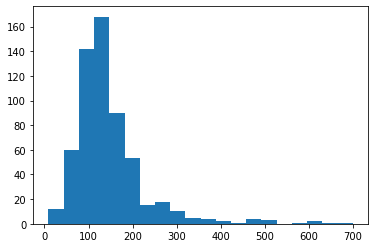

In [32]:
plt.hist(data["LoanAmount"],bins = 20)
plt.show()

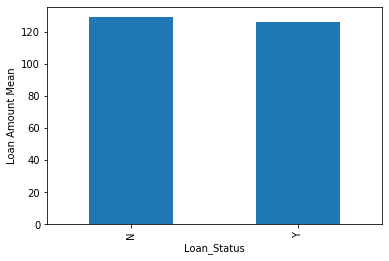

In [33]:
data.groupby("Loan_Status")["LoanAmount"].median().plot(kind = "bar")
plt.ylabel("Loan Amount Mean")
plt.show()

In [34]:
median_imp = SimpleImputer(missing_values = np.nan, strategy = "median")

In [35]:
data["LoanAmount"] = median_imp.fit_transform(data["LoanAmount"].values.reshape((-1,1)))

In [36]:
data["LoanAmount"].isnull().sum()

0

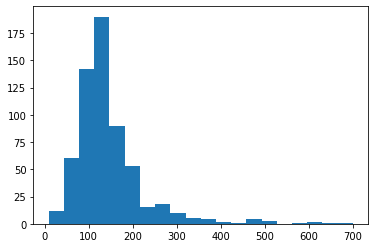

In [37]:
plt.hist(data["LoanAmount"],bins = 20)
plt.show()

In [38]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
data["Loan_Amount_Term"].dtype

dtype('float64')

In [40]:
data.loc[data["Loan_Amount_Term"].isnull(), :]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


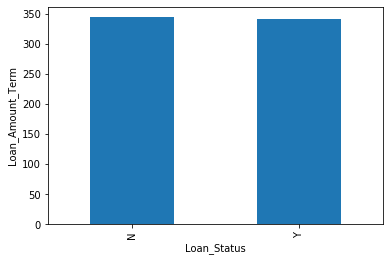

In [41]:
data.groupby("Loan_Status")["Loan_Amount_Term"].mean().plot(kind = "bar")
plt.ylabel("Loan_Amount_Term")
plt.show()

C:\Users\venug\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\venug\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


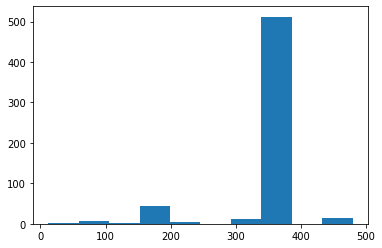

In [42]:
plt.hist(data["Loan_Amount_Term"])
plt.show()

In [43]:
data["Loan_Amount_Term"] = median_imp.fit_transform(data["Loan_Amount_Term"].values.reshape((-1,1)))

In [44]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

In [45]:
data["Credit_History"].fillna(value = 2, axis = 0, inplace = True)

In [46]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
categorical_features = ["Gender", "Married", "Dependents","Education","Self_Employed","Credit_History","Property_Area"]

In [49]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [50]:
data[categorical_features]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural
610,Male,Yes,3+,Graduate,No,1.0,Rural
611,Male,Yes,1,Graduate,No,1.0,Urban
612,Male,Yes,2,Graduate,No,1.0,Urban


In [51]:
data["Loan_Status"] = data["Loan_Status"].map({"Y":1,"N":0}).values

In [52]:
cleaned_data = pd.get_dummies(data, columns = categorical_features, drop_first = True)
cleaned_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Gender_Unknown,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_2.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1,1,0,0,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,0,1,0,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,1,0,0,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1,1,0,1,0,0,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,0,1,0,0,1


In [53]:
cleaned_data.shape

(614, 17)

In [54]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Loan_Status                614 non-null int64
Gender_Male                614 non-null uint8
Gender_Unknown             614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Credit_History_1.0         614 non-null uint8
Credit_History_2.0         614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(3), int64(2), uint8(12)
memory usage: 31.3 KB


In [55]:
X = cleaned_data.drop(columns = "Loan_Status", axis = 1)
y = cleaned_data["Loan_Status"]

In [56]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Gender_Unknown', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Credit_History_1.0',
       'Credit_History_2.0', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [57]:
y.unique()

array([1, 0], dtype=int64)

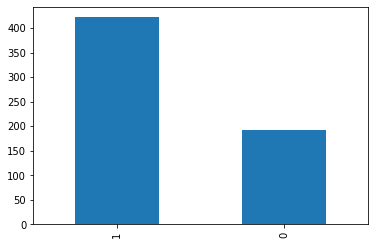

In [58]:
cleaned_data["Loan_Status"].value_counts().plot(kind = 'bar')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 16), (491,), (123, 16), (123,))

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = RandomForestClassifier(max_features='sqrt', class_weight = "balanced")

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt')

In [63]:
pred = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
print("Train Set Accuracy:",accuracy_score(y_train, model.predict(X_train)))
print("Test Set Accuracy:",accuracy_score(y_test, pred))

Train Set Accuracy: 1.0
Test Set Accuracy: 0.8211382113821138


In [66]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [67]:
from scipy.stats import randint
param_dist={'max_depth':[3,5,7,10,None],
              'n_estimators':[10,50,100,150,200,250,300,400,500],
              'max_features':randint(1,16),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,16),
              }

In [73]:
classifier = RandomForestClassifier(n_jobs = -1)

In [74]:
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 100, cv = 10)

In [75]:
search_clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001996B4E6208>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001996B4E6108>,
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300, 400, 500]})

In [76]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)
search_clfr.best_estimator_

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 12, 'min_samples_leaf': 8, 'n_estimators': 300}
0.8044489795918368


RandomForestClassifier(criterion='entropy', max_features=12, min_samples_leaf=8,
                       n_estimators=300, n_jobs=-1)

In [78]:
final_model = RandomForestClassifier(criterion='entropy', max_features=12, min_samples_leaf=8,
                       n_estimators=300, n_jobs=-1)

In [79]:
final_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=12, min_samples_leaf=8,
                       n_estimators=300, n_jobs=-1)

In [80]:
pred = final_model.predict(X_test)
print("Train Set Accuracy:",accuracy_score(y_train, final_model.predict(X_train)))
print("Test Set Accuracy:",accuracy_score(y_test, pred))

Train Set Accuracy: 0.8126272912423625
Test Set Accuracy: 0.8373983739837398


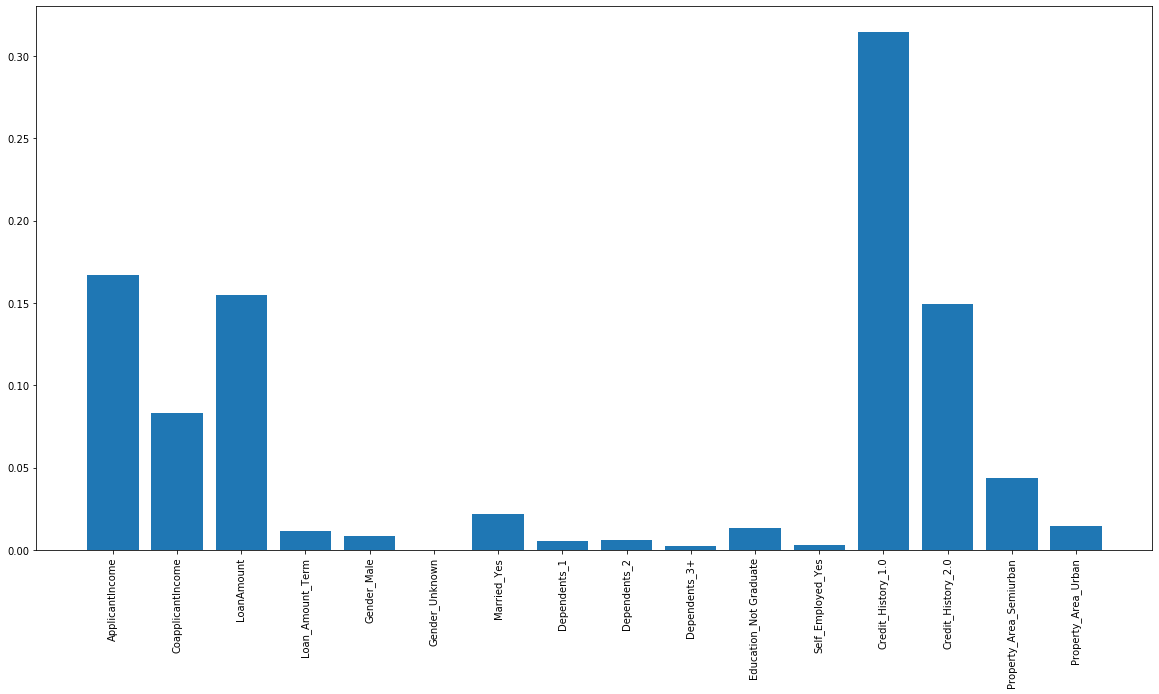

In [81]:
plt.figure(figsize = (20,10))
plt.bar(X.columns, final_model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [82]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Gender_Unknown', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Credit_History_1.0',
       'Credit_History_2.0', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [148]:
important_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History_1.0', 'Credit_History_2.0','Property_Area_Semiurban', 'Property_Area_Urban']

In [149]:
imp_X = X[important_features].values

In [150]:
X_train, X_test, y_train, y_test = train_test_split(imp_X, y, test_size = 0.1, random_state = 24)

In [151]:
imp_model = RandomForestClassifier(criterion='entropy', max_features=7, min_samples_leaf=8,
                       n_estimators=300, n_jobs=-1)

In [152]:
imp_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_leaf=8,
                       n_estimators=300, n_jobs=-1)

In [153]:
pred = imp_model.predict(X_test)
print("Train Set Accuracy:",accuracy_score(y_train, imp_model.predict(X_train)))
print("Test Set Accuracy:",accuracy_score(y_test, pred))

Train Set Accuracy: 0.8278985507246377
Test Set Accuracy: 0.8387096774193549


In [154]:
important_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History_1.0',
 'Credit_History_2.0',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [155]:
from xgboost import XGBClassifier

In [156]:
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [164]:
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=600)

In [165]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_params, 
                                   n_iter=5,
                                   cv = 3,
                                   scoring='roc_auc')

In [166]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.01,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600,...ne,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                 

In [167]:
params = random_search.best_params_
score = random_search.best_score_
print(params)
print(score)
random_search.best_estimator_

{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 1.0}
0.7374896536299569


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
pred = xgb_model.predict(X_test)
print("Train Set Accuracy:",accuracy_score(y_train, xgb_model.predict(X_train)))
print("Test Set Accuracy:",accuracy_score(y_test, pred))

Train Set Accuracy: 0.8315217391304348
Test Set Accuracy: 0.8387096774193549


In [171]:
from sklearn.tree import ExtraTreeClassifier

In [172]:
etc_model = ExtraTreeClassifier()

In [173]:
etc_params={'max_depth':[3,5,7,10,None],
              'max_features':randint(1,8),
               'criterion':['gini','entropy'],
               'min_samples_leaf':randint(1,8),
              }

In [174]:
search_clfr = RandomizedSearchCV(etc_model, param_distributions = etc_params, n_jobs=-1, n_iter = 100, cv = 4)

In [175]:
search_clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=ExtraTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001996C439388>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001996C439548>})

In [176]:
search_clfr.best_estimator_

ExtraTreeClassifier(criterion='entropy', max_depth=3, max_features=4,
                    min_samples_leaf=7)

In [177]:
etc_model = ExtraTreeClassifier(criterion='entropy', max_depth=3, max_features=4,
                    min_samples_leaf=7)

In [178]:
etc_model.fit(X_train, y_train)

ExtraTreeClassifier(criterion='entropy', max_depth=3, max_features=4,
                    min_samples_leaf=7)

In [179]:
pred = etc_model.predict(X_test)
print("Train Set Accuracy:",accuracy_score(y_train, etc_model.predict(X_train)))
print("Test Set Accuracy:",accuracy_score(y_test, pred))

Train Set Accuracy: 0.8061594202898551
Test Set Accuracy: 0.8387096774193549


In [180]:
from sklearn.ensemble import VotingClassifier

In [181]:
voting_model = VotingClassifier(estimators = [('rf', imp_model),('xgb', xgb_model),('etc', etc_model)], voting = "hard")

In [182]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=7,
                                                     min_samples_leaf=8,
                                                     n_estimators=300,
                                                     n_jobs=-1)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1.0, gamma=1,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=3,
  

In [183]:
pred = voting_model.predict(X_test)
print("Train Set Accuracy:",accuracy_score(y_train, voting_model.predict(X_train)))
print("Test Set Accuracy:",accuracy_score(y_test, pred))

Train Set Accuracy: 0.8170289855072463
Test Set Accuracy: 0.8387096774193549


In [184]:
test_data = pd.read_csv("test.csv")

In [185]:
test_data.fillna(value = np.nan, axis = 0, inplace = True)

test_data["Gender"].fillna(value = "Unknown", axis = 0, inplace = True)
test_data["Married"].fillna(value = "Unknown", axis = 0, inplace = True)
test_data["Dependents"] = imp_mode.fit_transform(test_data["Dependents"].values.reshape((-1,1)))
test_data["Self_Employed"] = imp_mode.fit_transform(test_data["Self_Employed"].values.reshape((-1,1)))
test_data["LoanAmount"] = median_imp.fit_transform(test_data["LoanAmount"].values.reshape((-1,1)))
test_data["Loan_Amount_Term"] = median_imp.fit_transform(test_data["Loan_Amount_Term"].values.reshape((-1,1)))
test_data["Credit_History"].fillna(value = 2, axis = 0, inplace = True)

categorical_features = ["Gender", "Married", "Dependents","Education","Self_Employed","Credit_History","Property_Area"]

test_cleaned_data = pd.get_dummies(test_data, columns = categorical_features, drop_first = True)
test_cleaned_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Gender_Unknown,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_2.0,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1,0,1,0,0,0,0,0,1,0,0,1
1,LP001022,3076,1500,126.0,360.0,1,0,1,1,0,0,0,0,1,0,0,1
2,LP001031,5000,1800,208.0,360.0,1,0,1,0,1,0,0,0,1,0,0,1
3,LP001035,2340,2546,100.0,360.0,1,0,1,0,1,0,0,0,0,1,0,1
4,LP001051,3276,0,78.0,360.0,1,0,0,0,0,0,1,0,1,0,0,1


In [186]:
test_cleaned_data.shape

(367, 17)

In [187]:
test_cleaned_data.columns, cleaned_data.drop(columns="Loan_Status").columns

(Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Gender_Male', 'Gender_Unknown', 'Married_Yes',
        'Dependents_1', 'Dependents_2', 'Dependents_3+',
        'Education_Not Graduate', 'Self_Employed_Yes', 'Credit_History_1.0',
        'Credit_History_2.0', 'Property_Area_Semiurban', 'Property_Area_Urban'],
       dtype='object'),
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Gender_Male', 'Gender_Unknown', 'Married_Yes',
        'Dependents_1', 'Dependents_2', 'Dependents_3+',
        'Education_Not Graduate', 'Self_Employed_Yes', 'Credit_History_1.0',
        'Credit_History_2.0', 'Property_Area_Semiurban', 'Property_Area_Urban'],
       dtype='object'))

In [188]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [189]:
test_cleaned_data.drop(columns = "Loan_ID", axis = 1, inplace = True)

In [190]:
test_cleaned_data.columns.shape

(16,)

In [191]:
test_X = test_cleaned_data[important_features]

In [192]:
test_X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_1.0,Credit_History_2.0,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,1,0,0,1
1,3076,1500,126.0,1,0,0,1
2,5000,1800,208.0,1,0,0,1
3,2340,2546,100.0,0,1,0,1
4,3276,0,78.0,1,0,0,1
...,...,...,...,...,...,...,...
362,4009,1777,113.0,1,0,0,1
363,4158,709,115.0,1,0,0,1
364,3250,1993,126.0,0,1,1,0
365,5000,2393,158.0,1,0,0,0


In [193]:
# test_model = RandomForestClassifier(max_features=5, min_samples_leaf=8, n_estimators=200,
#                        n_jobs=-1)
# test_model.fit(imp_X, y)

test_model = VotingClassifier(estimators = [('rf', imp_model),('xgb', xgb_model),('etc', etc_model)], voting = "hard")
test_model.fit(imp_X, y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=7,
                                                     min_samples_leaf=8,
                                                     n_estimators=300,
                                                     n_jobs=-1)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1.0, gamma=1,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=3,
  

In [194]:
test_pred = test_model.predict(test_X.values)

In [195]:
predictions = pd.Series(test_pred).apply(lambda x: 'Y' if x==1 else 'N').values
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [196]:
submission = pd.DataFrame({"Loan_ID":test_data["Loan_ID"].values, "Loan_Status":predictions})

In [197]:
submission.to_csv("submission.csv", index = False)